In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
tfile = "/Users/psinghai/Dream_AI/Projects/Disaster_tweets_classification/data/raw/train.csv"

In [4]:
df = pd.read_csv(tfile)
df.head(125)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
120,173,aftershock,"Oshawa, Canada",#WisdomWed BONUS - 5 Minute Daily Habits that ...,0
121,174,aftershock,Baker City Oregon,Aftershock: Protect Yourself and Profit in the...,0
122,175,aftershock,NaN,That moment when you get on a scary roller coa...,0
123,176,aftershock,NaN,Aftershock ã¢ (2010) Fullã¢ Streaming - YouT...,0


In [5]:
#class distribution
df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [6]:
#shape, columns
df.shape
#df.columns

(7613, 5)

In [8]:
## check tweets length
df['text'].str.len()
print(df['text'].describe())

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object


Text(0, 0.5, 'Count')

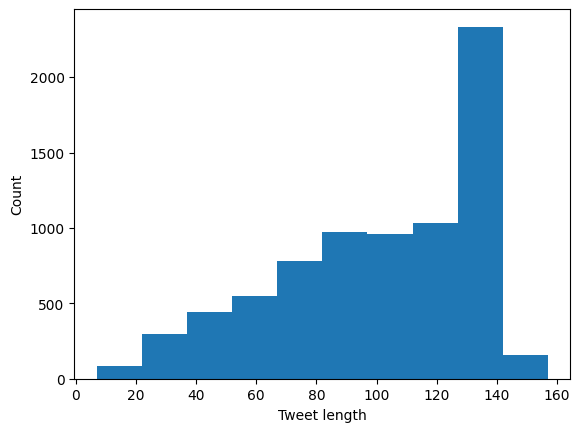

In [9]:
plt.hist(df['text'].str.len()) 
plt.xlabel('Tweet length')
plt.ylabel('Count')

In [10]:
def clean_text(text):
    # lowercase & white spaces
    text = text.str.lower()
    # remove mention
    text = text.str.replace(r"http\S+|www\S+|https\S+"," ", regex=True)
    # remove mention
    text = text.str.replace(r"@\w+"," ", regex=True)
    # remove #
    text = text.str.replace(r"#"," ", regex=True)
    # remove punctuations/number
    text = text.str.replace(r"[^a-z\s]", " ", regex=True)
    # remove extraspaces
    text = text.str.strip()
    return text
    

In [12]:
df['clean_text'] = clean_text(df['text'])
df

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as ...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,the out of control wild fires in california ev...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m utc km s of volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigating after an e bike collided ...


In [13]:
df

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as ...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,the out of control wild fires in california ev...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m utc km s of volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigating after an e bike collided ...


In [14]:
file_path = '/Users/psinghai/Dream_AI/Projects/Disaster_tweets_classification/data/processed/'
df.to_csv(file_path+'processed_train.csv')

In [ ]:
df['target'] = df['target'].astype(int)
df['target']

In [ ]:
dis_count = df['target'].sum()
nondis_count = len(df) - dis_count
dis_count